## **A. Global Lagrange interpolation**

In [ ]:
# import all the packages here
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
#Lagrange interpolation
def lagrangeInterp(f, interval, n):
    a = interval[0]
    b = interval[-1]
    m = (b+a)/2
    x = np.linspace(a, b, n+1)
    y = f(x)
    coeff = np.polyfit(x-m, y, n)
    return coeff

In [ ]:
sine = lambda x: np.sin(x)
for n in [1,2]:
    testCoeffs = lagrangeInterp(sine,[0, 2*np.pi], n)
    print(f'For n={n} the coefficients in descending order are {testCoeffs}')

For n=1 the coefficients in descending order are [-3.89817183e-17 -1.22464680e-16]
For n=2 the coefficients in descending order are [-2.48165326e-17 -3.89817183e-17  1.22464680e-16]


In [ ]:
#Evaluate interpolant
def evaluateInterpolant(coeffs, intervals, xVals, N):
    fVals = np.zeros((np.size(xVals)))

    if N == 1:
        for i in range(np.size(coeffs) - 1):
            m = (intervals[0] + intervals[1]) / 2
            fVals = np.polyval(coeffs, xVals - m)
    else:
        for k in range(N):
            coeff_int = coeffs[k, :]
            I_int = intervals[k, :]
            x_int = xVals[(I_int[0] <= xVals) & (xVals <= I_int[1])]
            m = (I_int[0] + I_int[1]) / 2
            y = np.polyval(coeff_int, x_int - m)
            fVals[(I_int[0] <= xVals) & (xVals <= I_int[1])] = y

    return fVals

In [ ]:
# Setting a value for p
p = 2

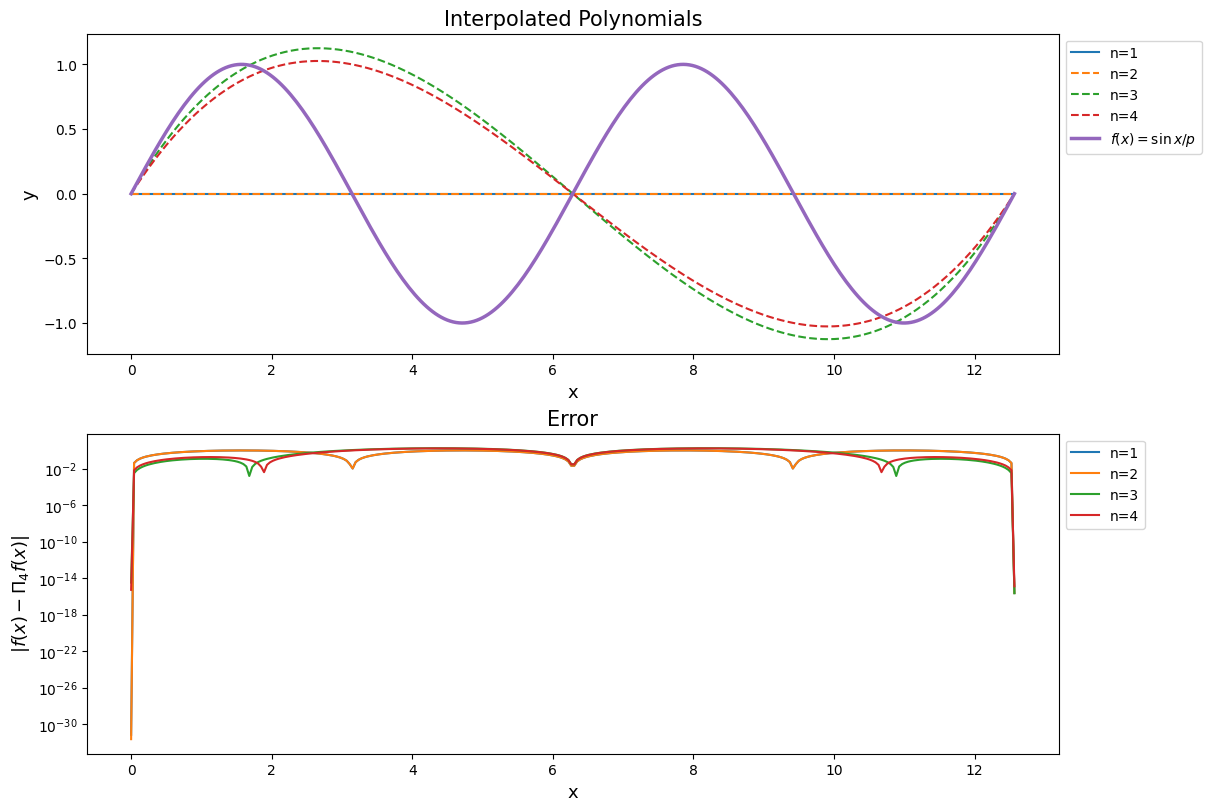

In [ ]:
#Discussion question A.1
N = 1
n = [1,2,3,4]

intervals = [0, 2*np.pi*p]
xSine = np.linspace(0, 2*np.pi*p, 300)
ySine = sine(xSine)

sine = lambda x: np.sin(x/p)

fig, ax = plt.subplots(2, 1, figsize=(12, 8), constrained_layout=True)

for i in n:
    if i != 1:
        style = 'dashed'
    else:
        style = 'solid'
    #solid line for visibility

    coeffs = lagrangeInterp(sine, intervals, i)
    yVals = evaluateInterpolant(coeffs, intervals, xSine, N)
    ax[0].plot(xSine, yVals, linestyle=style, label=f'n={i}')

    error = abs(ySine - yVals)


    ax[1].semilogy(xSine, error, linestyle='solid', label=f'n={i}')

ax[0].plot(xSine, ySine, label='$f(x) = \sin x/p$', linewidth=2.5)
ax[0].set_xlabel('x', fontsize=13)
ax[0].set_ylabel('y', fontsize=13)
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[0].set_title('Interpolated Polynomials', fontsize=15)

ax[1].set_title('Error', fontsize=15)
ax[1].set_xlabel('x', fontsize=13)
ax[1].set_ylabel('$|f(x)−Π_4f(x)|$', fontsize=13)
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

**A.1:** For each value of n, the error is close to zero at n+1 points
because we evaluate the interpolant at the point that coincides with the point of the function that is analysed (n). Looking at the tutorial question A2, we know that the +1 comes from the fact that we also take an additional point at the boundary, after the last node b.

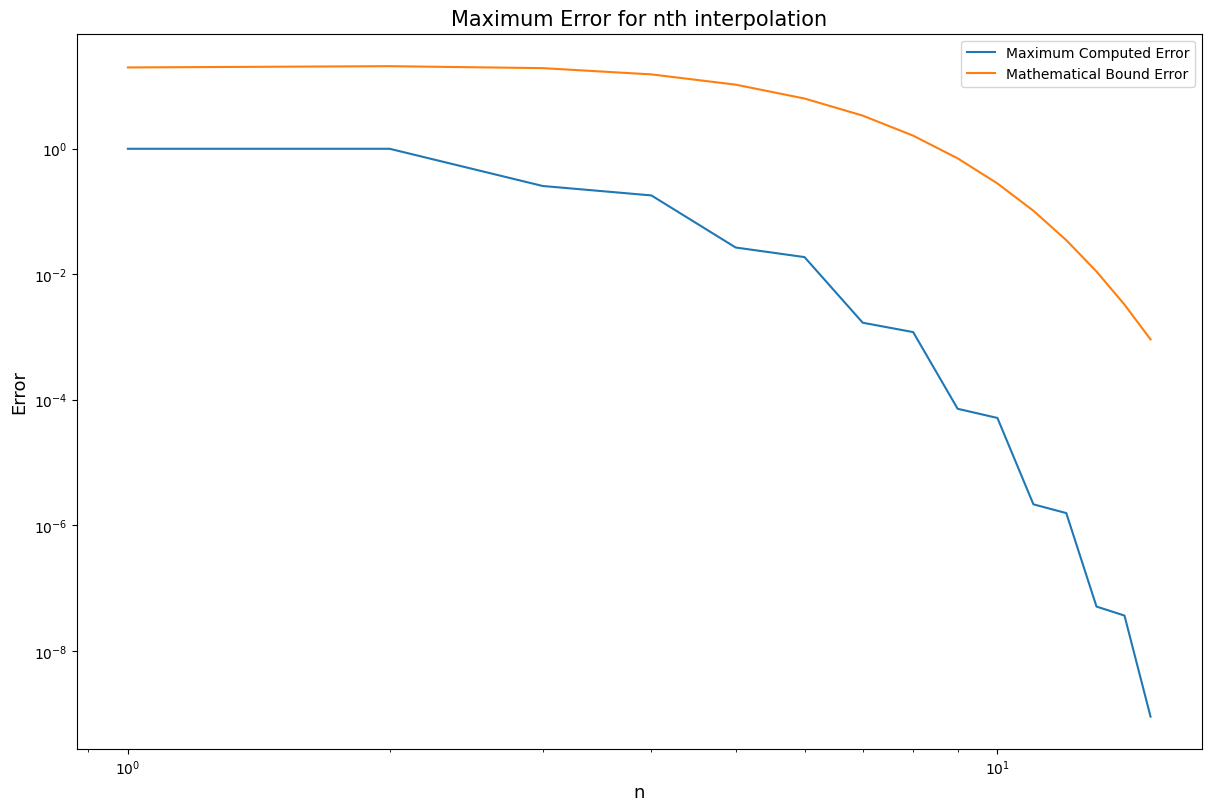

In [ ]:
#Discussion question A.2
N = 1
a = 0
b = 2*np.pi*p
n = np.array([i for i in range(1, 16, 1)])
intervals = [a, b]

xSine = np.linspace(0, 2*np.pi*p, 100)
ySine = sine(xSine)


fig = plt.figure(figsize=(12, 8), constrained_layout=True)

errors = []

boundError = lambda n,N: 1/( 4*(n+1) ) * ( (b - a) / (N*n) )**(n+1)

for i in n:
    coeffs = lagrangeInterp(sine, intervals, i)
    yVals = evaluateInterpolant(coeffs, intervals, xSine, N)

    nError = np.max(abs(ySine - yVals))
    errors.append(nError)

plt.loglog(n, errors, label='Maximum Computed Error')

yBound = boundError(n, N)

plt.loglog(n, yBound, label='Mathematical Bound Error')


plt.title('Maximum Error for nth interpolation', fontsize=15)
plt.xlabel('n', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.legend()

plt.show()

**A.2** The higher curve corresponds to the the right-hand side of equation (2), it has a curve with a higher slope in terms of the y axis, which can be seen in the graph. From the theory, we know that there is <= sign between the error and the right side of the equation; making the error smaller than the equation. The <= comes from the triangle inequality.

## **B. Piecewise interpolation and stability analysis**

In [ ]:
#Piecewise interpolation
def piecewiseInterp(f, interval, n, N):
    """
    INPUT:
    f             f scalar-valued function
    interval      interpolation interval [a, b]
    n             interpolation order
    N             number of subintervals

    OUTPUT:
    coeffs        i-th row are centered coefficients of i-th subinterval
    intervals     i-th row are begin and endpoint of i-th subinterval
    """
    s = ( interval[1] - interval[0] ) / N
    #separation of the subintervals

    ext = [( interval[0] + s*i ) for i in range(N+1)]
    #subintervals positions in x axis
    intervals = [[ext[n], ext[n+1]] for n in range(N)]
    #intervals in each subinterval

    coeffs = []

    for i in intervals:
        coN = lagrangeInterp(f, i, n)
        coeffs.append(coN)

    return np.array(intervals), np.array(coeffs)

For N = 1 the coefficient output has to be equivalent to that of lagrangeInterp, however the provided code raises an error whenever we try to calculate the Piecewise Interpolant.

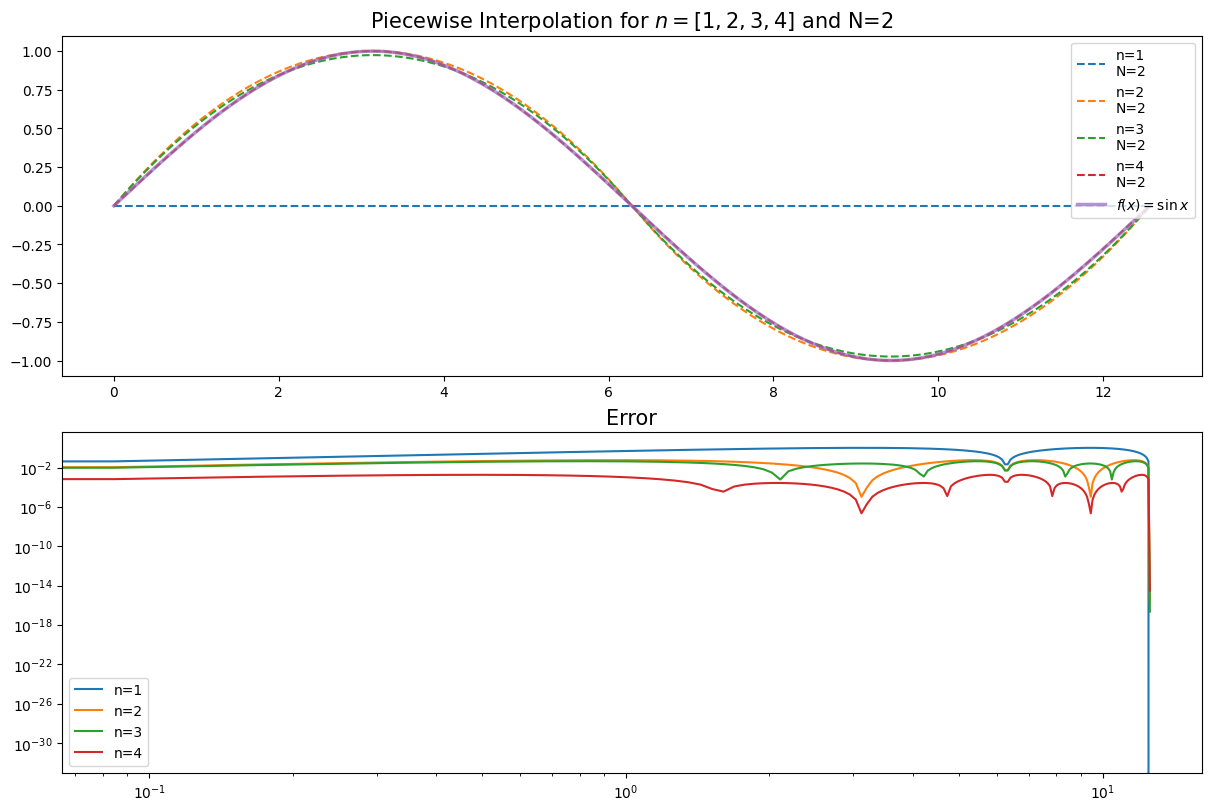

In [ ]:
N = 2
n = [1,2,3,4]
a = 0
b = 2*np.pi*p
xVals = np.linspace(a, b, 150)

fig, ax = plt.subplots(2, 1, figsize=(12, 8), constrained_layout=True)

ySine = sine(xVals)


for j in n:
    intervals, coeffs = piecewiseInterp(sine, [a, b], j, N)
    yPiece = evaluateInterpolant(coeffs, intervals, xVals, N)

    ax[0].plot(xVals, yPiece, label=f'n={j}\nN={N}', linestyle='dashed')

    error = abs(ySine - yPiece)

    ax[1].loglog(xVals, error, linestyle='solid', label=f'n={j}')

ax[0].plot(xVals, ySine, label='$f(x)= \sin x$', linewidth=2.5, alpha=0.7)

ax[0].legend()
ax[1].legend()

ax[0].set_title(f'Piecewise Interpolation for $n={n}$ and N={N}', fontsize=15)
ax[1].set_title(f'Error', fontsize=15)

plt.show()

**REPEAT A.1**
For each value of n, the error is close to zero at n+1 points
because we evaluate the interpolant at the point which coincides with the point of the function that is analysed (n). Looking at the tutorial question A2, we know that the +1 comes from the fact that we also take an additional point at the boundary, after the last node b.

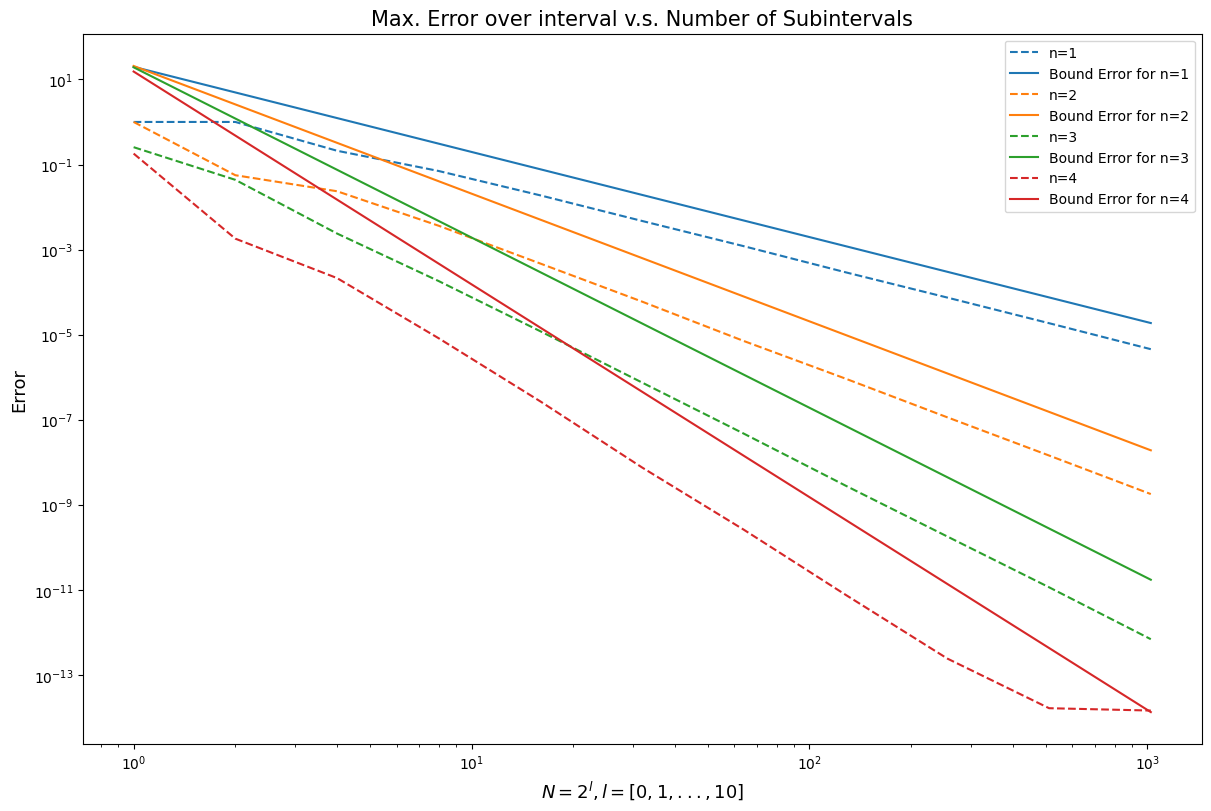

In [ ]:
## Discussion question B.1
N = [2**i for i in range(11)] # N >= 2
n = [1,2,3,4]
a = 0
b = 2*np.pi*p
xVals = np.linspace(a, b, 100)
ySine = sine(xVals)

fig = plt.figure(figsize=(12,8), constrained_layout=True)

errors = []
boundErrors = []

upperBoundError = lambda n,N: 1/( 4*(n+1) ) * ( (b - a) / (N*n) )**(n+1)

for i in N:
    for j in n:
        if i == 1:
            intervals, coeffs = piecewiseInterp(sine, [a, b], j, i)
            yPiece = evaluateInterpolant(coeffs[0], intervals[0], xVals, i)
        else:
            intervals, coeffs = piecewiseInterp(sine, [a, b], j, i)
            yPiece = evaluateInterpolant(coeffs, intervals, xVals, i)

        maxError = np.max(abs(ySine - yPiece))

        errors.append(maxError)

        boundError = upperBoundError(j,i)
        boundErrors.append(boundError)

        # print(f'N={i}, n={j}, Max.Error={maxError}, Bound.Error={boundError}')


matrix = np.reshape(np.array(errors), (len(N), len(n))).T
# print(matrix)
boundMatrix = np.reshape(np.array(boundErrors), (len(N), len(n))).T

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i in range(len(n)):
    plt.loglog(N, matrix[i], label=f'n={i+1}', c=colors[i], linestyle='dashed')
    plt.loglog(N, boundMatrix[i], label=f'Bound Error for n={i+1}', c=colors[i])


plt.xlabel(f'$N = 2^l, l=[0,1,...,10]$', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.title('Max. Error over interval v.s. Number of Subintervals',
          fontsize=15)
plt.legend()

plt.show()


**B.1** The formula for the piecewise interpolation error shows that with increasing N=2**l the slope decreases as number of subintervals increases; as can be see in equation 3. This is because the interpolation becomes more accurate, thus reducing the error with respect to the function. And it is a linear function because there is the (H/n) term that has an exponential depending on the order of the polynomial.

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21.]
[0.9998741276738752, 0.9998741276738751, 0.25531280905287845, 0.18062139140991684, 0.026750896966575566, 0.01881703618498226, 0.0016948966367499319, 0.0012025121115883386, 7.223548204049468e-05, 5.155451502755759e-05, 2.170952526858727e-06, 1.5747932959886413e-06, 5.1107827692131735e-08, 3.671245860092931e-08, 9.030549641408925e-10, 6.434165977786677e-10, 1.2381248803983169e-11, 9.135400769189062e-12, 2.7784718970025324e-13, 5.218742105128626e-13]


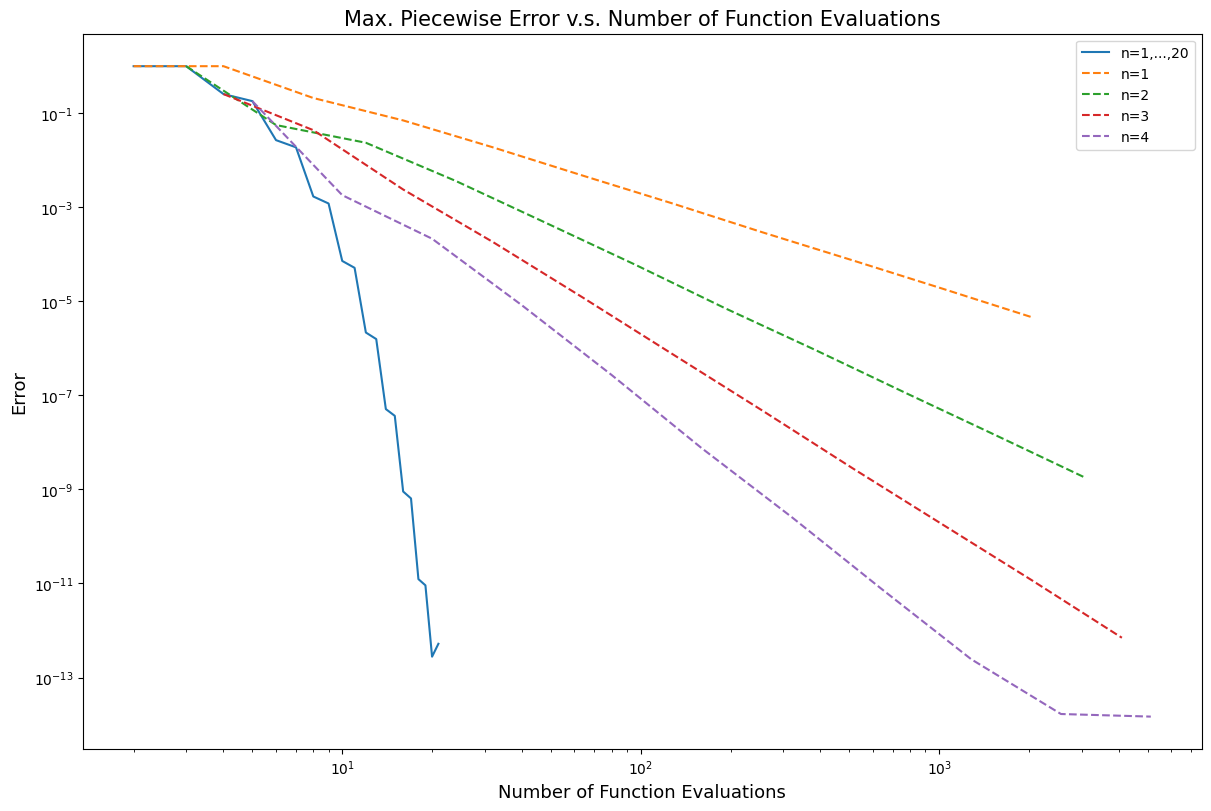

In [106]:
## Discussion question B.2
a = 0
b = 2*np.pi*p
interval = [a, b]
xVals = np.linspace(a, b, 100)
ySine = sine(xVals)

fig = plt.figure(figsize=(12,8), constrained_layout=True)

evalNum = lambda n: n+1

ns = np.linspace(1,20,20)

x = evalNum(ns)

errors = []


for n in range(1,21):
        null, coeffs = piecewiseInterp(sine, interval, n, 1)
        yPiece = evaluateInterpolant(coeffs[0], interval, xVals, 1)

        maxError = np.max(abs(ySine - yPiece))
        errors.append(maxError)

plt.loglog(x, errors, label='n=1,...,20')

print(x)
print(errors)

# Piecewise plotting
Ns = [2**i for i in range(11)] # N >= 2
ns = [1,2,3,4]


errors = []
evalTimes = []

pieceFuncEval = lambda n,N: N*(n+1)

for N in Ns:
    for n in ns:
        if N == 1:
            intervals, coeffs = piecewiseInterp(sine, [a, b], n, N)
            yPiece = evaluateInterpolant(coeffs[0], intervals[0], xVals, N)
        else:
            intervals, coeffs = piecewiseInterp(sine, [a, b], n, N)
            yPiece = evaluateInterpolant(coeffs, intervals, xVals, N)

        maxError = np.max(abs(ySine - yPiece))

        errors.append(maxError)

        evalTime = pieceFuncEval(n, N)
        evalTimes.append(evalTime)

        # print(f'N={N}, n={n}, Max.Error={evalTime}')


matrix = np.reshape(np.array(errors), (len(Ns), len(ns))).T
evalMat = np.reshape(np.array(evalTimes), (len(Ns), len(ns))).T

for i in range(len(ns)):
    plt.loglog(evalMat[i], matrix[i], linestyle='dashed', label=f'n={i+1}')

plt.xlabel(f'Number of Function Evaluations', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.title('Max. Piecewise Error v.s. Number of Function Evaluations',
          fontsize=15)
plt.legend()
plt.show()

**B.2** Using subintervals N leads to a higher number of evaluations, because from theory, the Lagrange interpolation needs n+1 evaluations, but the piecewise needs N*(n+1) evaluations. For the latter, we are looking at the total number of evaluations per sub-interval.
Thus, the method that leads to a smaller number of evaluations is the global interpolation error.

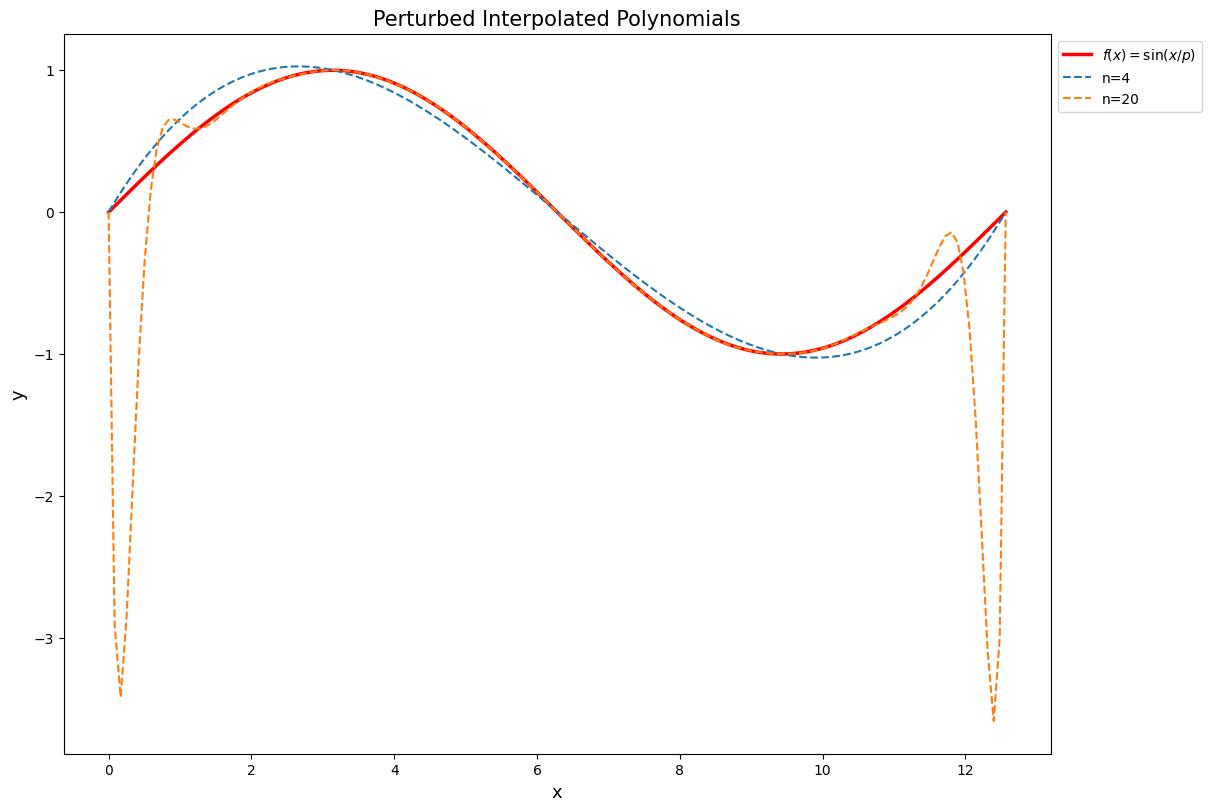

In [ ]:
# Global interpolation of perturbed f
fHat = lambda x: np.sin(x/p) + 0.001*np.cos((8*x)/p)

N = 1
n = [4, 20]
intervals = [0, 2*np.pi*p]


xSine = np.linspace(0, 2*np.pi*p, 150)
ySine = sine(xSine)
yPerturb = fHat(xSine)


fig = plt.figure(figsize=(12, 8), constrained_layout=True)

plt.plot(xSine, ySine, label='$f(x) = \sin (x/p)$', linewidth=2.5, c='red')

for i in n:
    coeffs = lagrangeInterp(fHat, [0, 2*np.pi*p], i)
    yVals = evaluateInterpolant(coeffs, intervals, xSine, N)
    plt.plot(xSine, yVals, linestyle='dashed', label=f'n={i}')

plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Perturbed Interpolated Polynomials', fontsize=15)

plt.show()

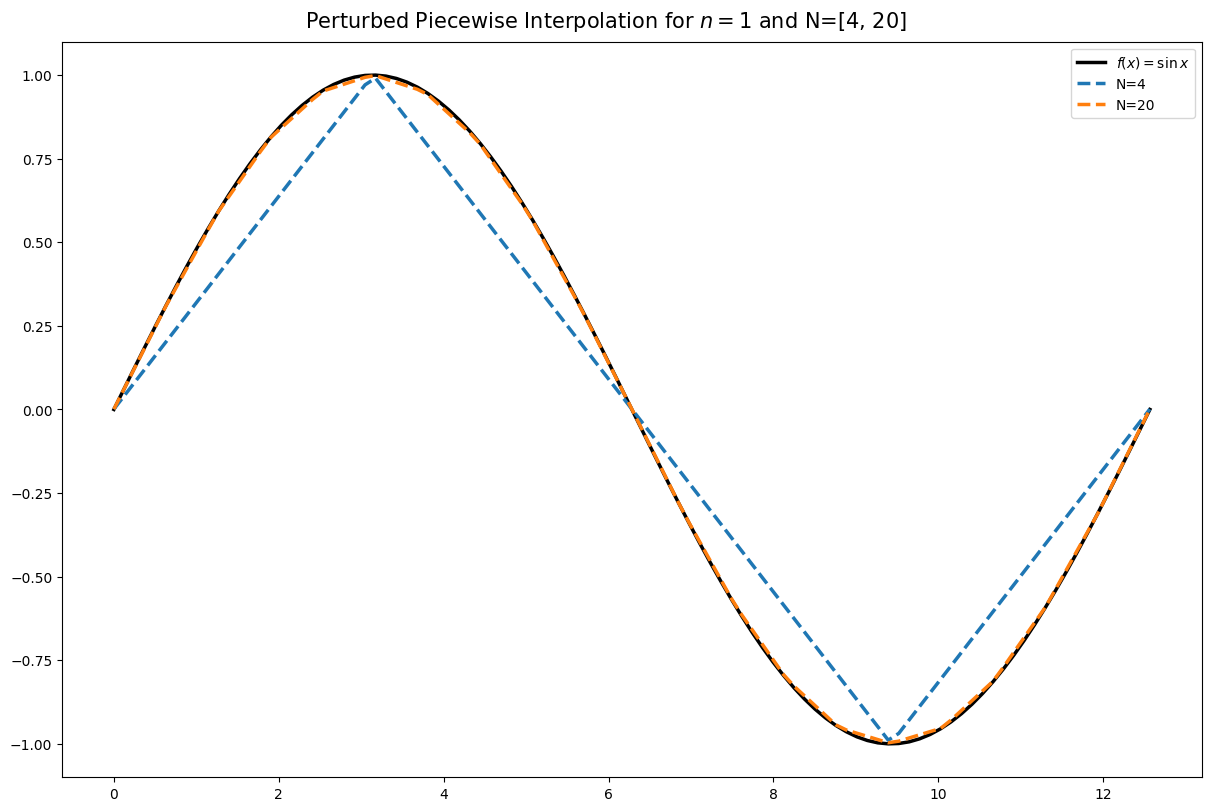

In [ ]:
# Piecewise interepolation of perturbed f
N = [4, 20] # N >= 2
n = 1
a = 0
b = 2*np.pi*p

xVals = np.linspace(a, b, 100)
ySine = sine(xVals)

fig = plt.figure(figsize=(12,8), constrained_layout=True)

plt.plot(xVals, ySine, label='$f(x)= \sin x$', linewidth=2.5, c='black')

for i in N:
    intervals, coeffs = piecewiseInterp(fHat, [a, b], n, i)
    yPiece = evaluateInterpolant(coeffs, intervals, xVals, i)

    plt.plot(xVals, yPiece, label=f'N={i}', linestyle='dashed', linewidth=2.5)

plt.legend()

fig.suptitle(f'Perturbed Piecewise Interpolation for $n={n}$ and N={N}', fontsize=15)

plt.show()

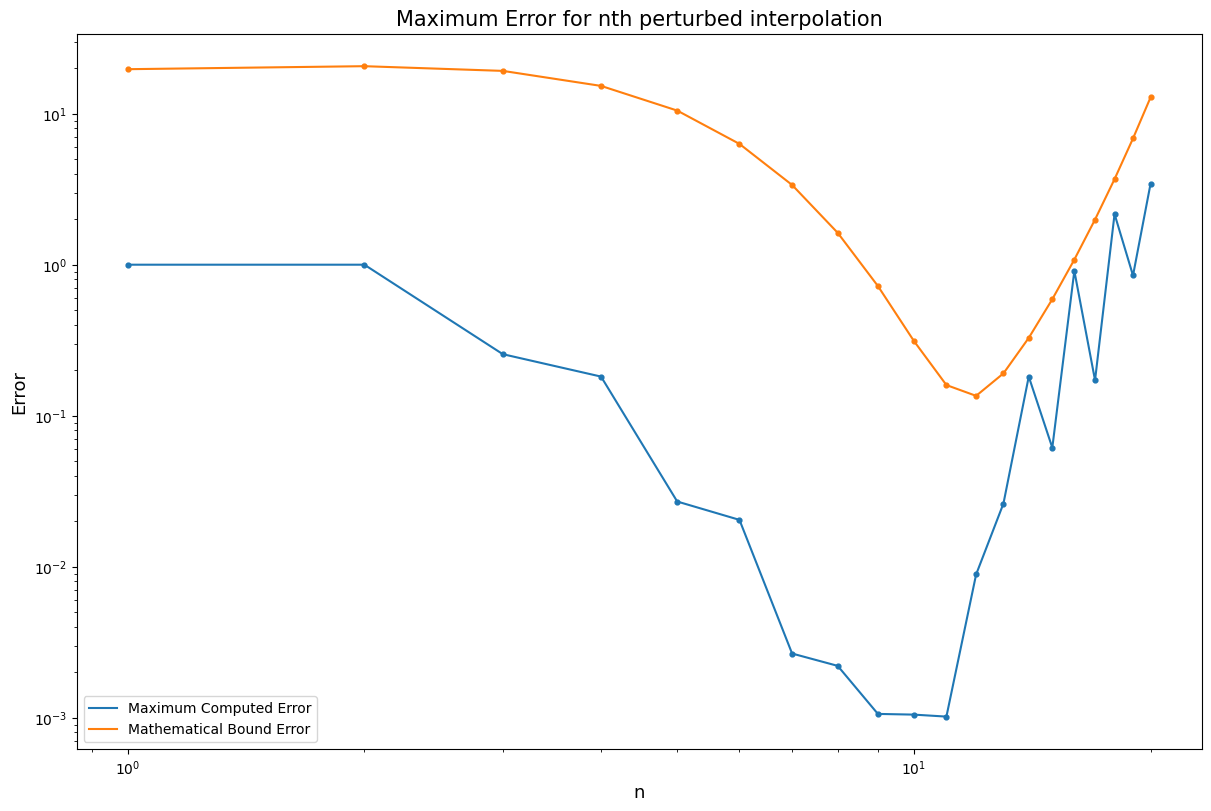

In [ ]:
N = 1
a = 0
b = 2*np.pi*p
n = np.array([i for i in range(1, 21)])
intervals = [a, b]

xSine = np.linspace(0, 2*np.pi*p, 100)
ySine = sine(xSine)
yPerturb = fHat(xSine)
eps = yPerturb - ySine

fig = plt.figure(figsize=(12,8), constrained_layout=True)

errors = []

boundError = lambda n,N: 1/( 4*(n+1) ) * ( (b - a) / n )**(n+1) + ( 2**(n+1) )  / ( np.e*n*np.log(n) + 0.5772) * max(eps)


for i in n:
    coeffs = lagrangeInterp(fHat, [0, 2*np.pi*p], i)
    yVals = evaluateInterpolant(coeffs, intervals, xSine, N)

    nError = np.max(abs(yVals - ySine))
    errors.append(nError)

plt.loglog(n, errors, label='Maximum Computed Error')
plt.scatter(n, errors, s=12)

yBound = boundError(n, N)

plt.loglog(n, yBound, label='Mathematical Bound Error')
plt.scatter(n, yBound, s=12)

plt.title('Maximum Error for nth perturbed interpolation', fontsize=15)
plt.xlabel('n', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.legend(loc='lower left')

plt.show()

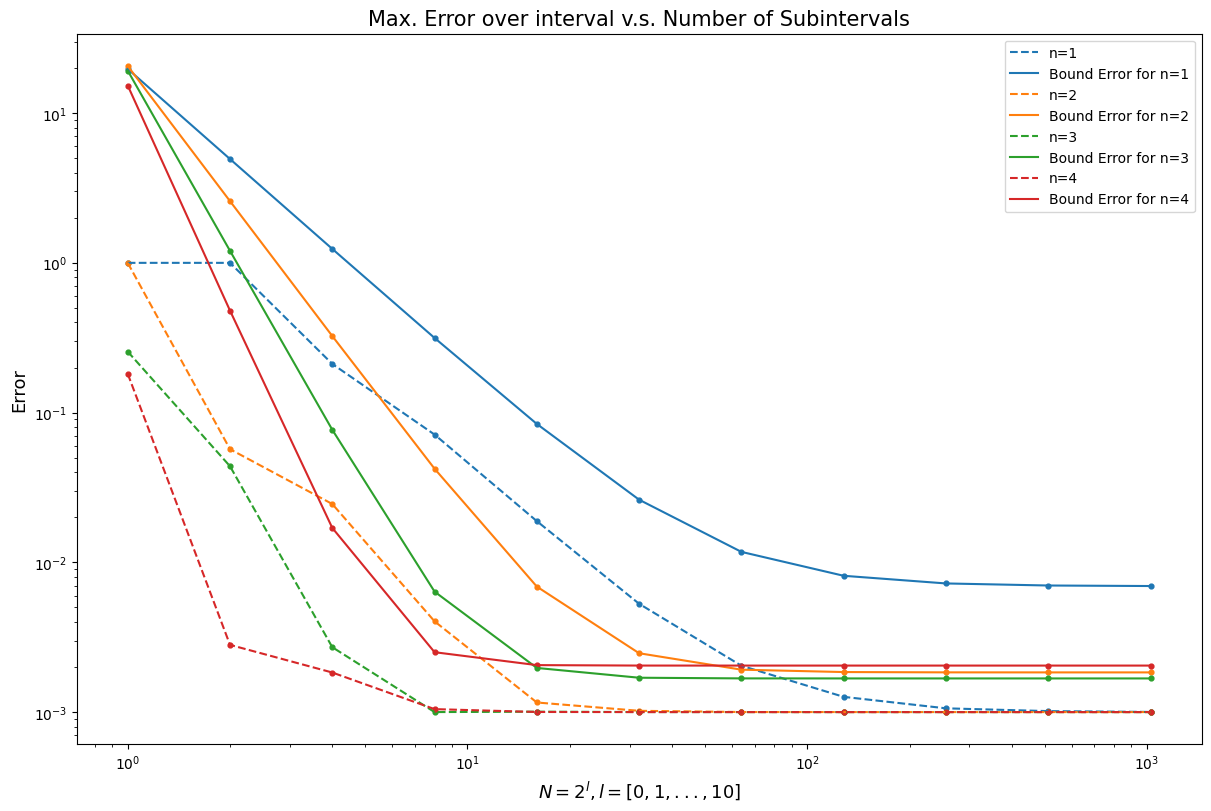

In [ ]:
N = [2**i for i in range(11)]
n = [1,2,3,4]
a = 0
b = 2*np.pi*p
xVals = np.linspace(a, b, 200)
ySine = sine(xVals)

fig = plt.figure(figsize=(12,8), constrained_layout=True)

errors = []
boundErrors = []

upperBoundError = lambda n, N: 1/( 4*(n+1) ) * ( (b - a) / (N*n) )**(n+1) + ( 2**(n+1) ) / ( np.e*n*np.log(n) + 0.5772) * max(eps)

for i in N:
    for j in n:
        if i == 1:
            intervals, coeffs = piecewiseInterp(fHat, [a, b], j, i)
            yPiece = evaluateInterpolant(coeffs[0], intervals[0], xVals, i)
        else:
            intervals, coeffs = piecewiseInterp(fHat, [a, b], j, i)
            yPiece = evaluateInterpolant(coeffs, intervals, xVals, i)

        maxError = np.max(abs(ySine - yPiece))

        errors.append(maxError)

        boundError = upperBoundError(j,i)
        boundErrors.append(boundError)

        # print(f'N={i}, n={j}, Max.Error={maxError}, Bound.Error={}')

matrix = np.reshape(np.array(errors), (len(N), len(n))).T
boundMatrix = np.reshape(np.array(boundErrors), (len(N), len(n))).T

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i in range(len(n)):
    plt.loglog(N, matrix[i], label=f'n={i+1}', c=colors[i], linestyle='dashed')
    plt.loglog(N, boundMatrix[i], label=f'Bound Error for n={i+1}', c=colors[i])

    plt.scatter(N, matrix[i], c=colors[i], s=12)
    plt.scatter(N, boundMatrix[i], c=colors[i], s=12)

plt.xlabel(f'$N = 2^l, l=[0,1,...,10]$', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.title('Max. Error over interval v.s. Number of Subintervals',
          fontsize=15)
plt.legend()

plt.show()


**B.3**
a) As n increases the max error first decreases and then reaches a point where it increases again. This is because of the Lebesgue factor included on the right hand side of equation 4.

b) Because N has an exponential depending on j that goes to values up until 10, we find a similar situation to that of the normal error. However, in this case we find again the (H/n) factor causing the error to behave the way it does with increasing N.

c) The combination that would lead to a more similar error is a high value for the number of subintervals N and a low n, because it is the best fit for both cases; there would be a high number of sub intervals and smaller number for the order.

## **C. Integration**

In [ ]:
#Example numerical functions

# def test_function0(x):
#     return np.array([2 for i in range(len(x))])

def test_function1(x):
    return x

def test_function2(x):
    return x**2

def test_function3(x):
    return x**3

def test_function4(x):
    return x**4

In [ ]:
#Composite integration
def compositeIntegr(f, interval, n, N):
    intervals, c = piecewiseInterp(f=f, interval=interval, n=n, N=N)
    num_integral = 0.
    k = 0
    for j in intervals:
        a = j[0]
        b = j[1]
        m = ( j[0] + j[1] ) / 2

        for i in range(0, n+1):
            num_integral += ( c[k][i] / (n-i+1) ) * ( (b-m)**(n-i+1) - (a-m)**(n-i+1) )

        k += 1

    return num_integral

In [ ]:
#Definition of trapezoid and simpson's rule
def trapezoid(interval, f):
    a = interval[0]
    b = interval[1]

    return ( ( b-a ) * ( f(a) + f(b) ) ) / 2

def simpson(interval, f):
    a = interval[0]
    b = interval[1]
    m = (a+b) / 2

    return ( (b-a) / 6) * (f(a) + 4*f(m) + f(b))

In [ ]:
#Trapezoid trials
test2t = compositeIntegr(test_function1, [0,1], 1, 1)
print(test2t)
print(trapezoid([0,1], test_function1))

test3t = compositeIntegr(test_function2, [0,1], 1, 1)
print(test3t)
print(trapezoid([0,1], test_function2))

test4t = compositeIntegr(test_function3, [0,1], 1, 1)
print(test4t)
print(trapezoid([0,1], test_function3))

test5t = compositeIntegr(test_function4, [0,1], 1, 1)
print(test5t)
print(trapezoid([0,1], test_function4))

0.5000000000000001
0.5
0.5000000000000001
0.5
0.5000000000000001
0.5
0.5000000000000001
0.5


In [ ]:
#Simpson trials
test2s = compositeIntegr(test_function1, [0,1], 2, 1)
print("first order approx",test2s)
print("first order exact",simpson([0,1],test_function1))

test3s = compositeIntegr(test_function2, [0,1], 2, 1)
print("second order approx",test3s)
print("second order exact",simpson([0,1],test_function2))

test4s = compositeIntegr(test_function3, [0,1], 2, 1)
print("third order approx",test4s)
print("third order exact",simpson([0,1],test_function3))

test5s = compositeIntegr(test_function4, [0,1], 2, 1)
print("fourth order approx",test5s)
print("fourth order approx",simpson([0,1],test_function4))

first order approx 0.4999999999999999
first order exact 0.5
second order approx 0.33333333333333326
second order exact 0.3333333333333333
third order approx 0.24999999999999994
third order exact 0.25
fourth order approx 0.20833333333333331
fourth order approx 0.20833333333333331


**C.1** The degree of exactness of the Trapezoidal and Simpson's formulas are 1 and 3, but the function doesn't break for a higher degree in any of the cases.

In [ ]:
#Discussion question C.2
sine2 = lambda x: np.sin(x)**2

ns = range(1,6)
Ns = [2**i for i in range(0,9)]
interval = [0, 1]

for N in Ns:
    for n in ns:
        numInt = compositeIntegr(sine2, interval, n, N)

        print(f'N={N}, n={n}, Int={numInt}')

N=1, n=1, Int=0.3540367091367856
N=1, n=2, Int=0.2712448010895486
N=1, n=3, Int=0.27204827089420824
N=1, n=4, Int=0.27268426528641054
N=1, n=5, Int=0.27268047973191656
N=2, n=1, Int=0.2919427781013579
N=2, n=2, Int=0.2725942987741066
N=2, n=3, Int=0.27263961023968647
N=2, n=4, Int=0.27267576471225385
N=2, n=5, Int=0.27267571160844706
N=4, n=1, Int=0.2774314186059195
N=4, n=2, Int=0.2726706730911196
N=4, n=3, Int=0.272673436142864
N=4, n=4, Int=0.27267564514402426
N=4, n=5, Int=0.2726756443354912
N=8, n=1, Int=0.2738608594698197
N=8, n=2, Int=0.2726753343907178
N=8, n=3, Int=0.2726755060318016
N=8, n=4, Int=0.27267564332231475
N=8, n=5, Int=0.27267564330976235
N=16, n=1, Int=0.27297171566049333
N=16, n=2, Int=0.27267562401409
N=16, n=3, Int=0.27267563472536027
N=16, n=4, Int=0.27267564329402777
N=16, n=5, Int=0.2726756432938322
N=32, n=1, Int=0.27274964692569087
N=32, n=2, Int=0.2726756420890317
N=32, n=3, Int=0.27267564275823175
N=32, n=4, Int=0.2726756432935865
N=32, n=5, Int=0.272675

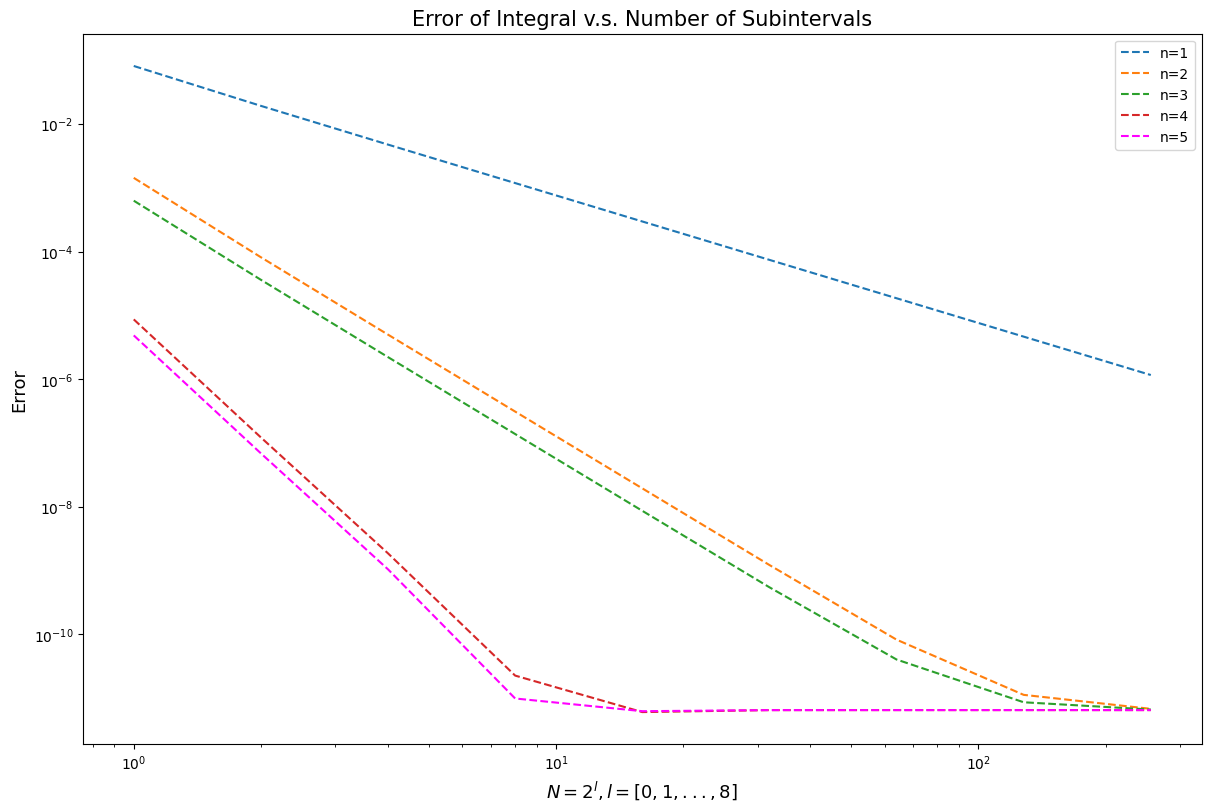

In [ ]:
xVals = np.linspace(0, 1, 100)
ySine = sine2(xVals)

fig = plt.figure(figsize=(12,8), constrained_layout=True)

errors = []

for N in Ns:
    for n in ns:
        numInt = compositeIntegr(sine2, interval, n, N)

        error = abs(0.2726756433 - numInt)

        errors.append(error)

        # print(f'N={N}, n={n}, Error={error}')


matrix = np.reshape(np.array(errors), (len(Ns), len(ns))).T

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'magenta']

for i in range(len(ns)):
    plt.loglog(Ns, matrix[i], label=f'n={i+1}', c=colors[i], linestyle='dashed')


plt.xlabel(f'$N = 2^l, l=[0,1,...,8]$', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.title('Error of Integral v.s. Number of Subintervals',
          fontsize=15)
plt.legend()

plt.show()

**C.2.**
Since we used sin^2(x) we see that if we increase the number of subintervals the error decreases, which coincides with the theory and it makes sense considering that we use more points for the interpolation.
On the other hand if we use polynomials with different powers of x, we see that for some values the integration is exact (or nearly exact), which also makes sense considering that for trapezoidal and simpson method, some integrals are calculated exactly according to theory.